In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [6]:
players = pd.read_excel("C:\\Users\\ABDUL_HADI\\Desktop\\ML Lab\\KMeans_clustering\\archive\\Career Mode player datasets - FIFA 15-22.xlsx")

In [8]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,100500000.0,550000.0,27,...,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,79000000.0,375000.0,29,...,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,"RM, LM, RW",90,90,54500000.0,275000.0,30,...,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/nl.png
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,52500000.0,275000.0,32,...,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1363/60.png,https://cdn.sofifa.net/flags/se.png
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,63500000.0,300000.0,28,...,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png


In [10]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]
players = players.dropna(subset=features)
data = players[features].copy()

In [12]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,93,95,550000.0,100500000.0,27
1,92,92,375000.0,79000000.0,29
2,90,90,275000.0,54500000.0,30
3,90,90,275000.0,52500000.0,32
4,90,90,300000.0,63500000.0,28


In [14]:
#Standardizing data values(between 1-10)
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [16]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,15844.000000,15844.000000,15844.000000,15844.000000,15844.000000
mean,5.488837,5.877253,1.205862,1.107534,4.099754
std,1.355506,1.266698,0.431565,0.282859,1.626624
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.584906,5.038462,1.000000,1.012836,2.785714
50%,5.528302,5.807692,1.054745,1.034727,3.857143
75%,6.283019,6.769231,1.145985,1.081991,5.285714
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [18]:
#Initializing random centroids

def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [20]:
centroids = random_centroids(data, 5)  #K=5
centroids

C:\Users\ABDUL_HADI\AppData\Local\Temp\ipykernel_27912\2305657931.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2,3,4
overall,5.905660,3.264151,4.396226,4.018868,5.905660
potential,5.230769,6.769231,5.230769,5.423077,5.615385
wage_eur,1.072993,1.036496,1.000000,1.000000,1.000000
value_eur,1.007861,1.001891,1.009851,1.012836,1.288461
age,2.071429,2.785714,3.142857,1.714286,7.428571


In [22]:
#Get Labels for each data points

def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)  #Returns index of centroid having min dist with data point

In [24]:
labels = get_labels(data, centroids)

In [26]:
labels.value_counts()

2    5701
4    4612
0    3231
3    1957
1     343
Name: count, dtype: int64

In [28]:
#Finding new centroids by finding mean
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).mean().T
    return centroids


In [30]:
# Function to calculate WCSS
def calculate_wcss(data, labels, centroids):
    wcss = 0
    for i in range(len(centroids.columns)):
        wcss += ((data[labels == i] - centroids.iloc[:, i]) ** 2).sum().sum()
    return wcss

C:\Users\ABDUL_HADI\AppData\Local\Temp\ipykernel_27912\2305657931.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))
C:\Users\ABDUL_HADI\AppData\Local\Temp\ipykernel_27912\2305657931.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))
C:\Users\ABDUL_HADI\AppData\Local\Temp\ipykernel_27912\2305657931.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))
C:\Users\ABDUL_HADI\AppData\Local\Temp\ipykernel_27912\2305657931.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(se

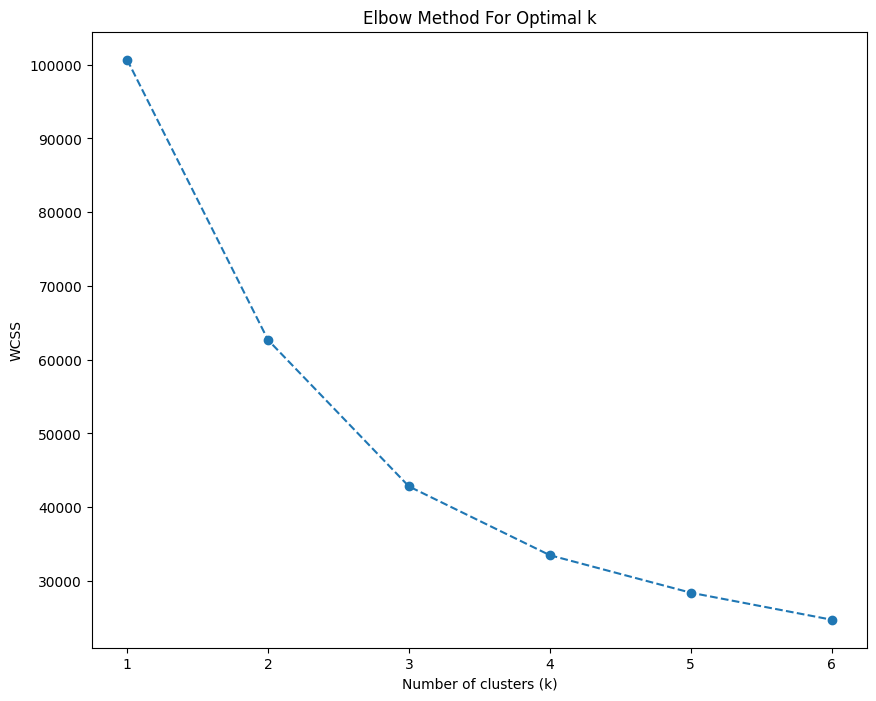

In [32]:
# Elbow Method to determine the optimal number of clusters
max_iterations = 100
wcss_values = []
k_values = range(1, 7)

for k in k_values:
    centroids = random_centroids(data, k)
    old_centroids = pd.DataFrame()
    iteration = 1

    while iteration < max_iterations and not centroids.equals(old_centroids):
        old_centroids = centroids
        labels = get_labels(data, centroids)
        centroids = new_centroids(data, labels, k)
        iteration += 1

    wcss = calculate_wcss(data, labels, centroids)
    wcss_values.append(wcss)

# Plotting the elbow curve
plt.figure(figsize=(10, 8))
plt.plot(k_values, wcss_values, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [34]:
def plot_clusters(data, labels, centroids):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

C:\Users\ABDUL_HADI\AppData\Local\Temp\ipykernel_27912\2305657931.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


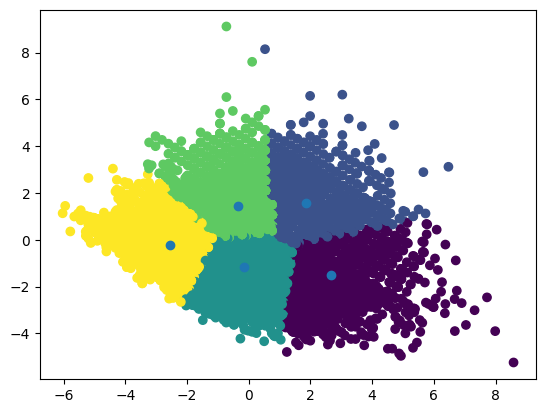

In [36]:
max_iterations = 100
K = 5

centroids = random_centroids(data, K)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, K)
    iteration += 1

plot_clusters(data, labels, centroids)


In [38]:
centroids
#Cluster 0 represents star players
#Cluster 2 represents young players with massive potential

,0,1,2,3,4
overall,7.676008,6.290659,5.674342,4.944718,3.809654
potential,7.811463,5.841621,6.569833,4.788211,4.889195
wage_eur,2.038929,1.215462,1.093774,1.038414,1.003022
value_eur,1.537712,1.087177,1.055817,1.028719,1.008132
age,4.483193,6.395879,3.134241,4.969755,2.432855


In [42]:
players[labels == 0][["short_name"] + features]  

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,95,550000.0,100500000.0,27
1,Cristiano Ronaldo,92,92,375000.0,79000000.0,29
2,A. Robben,90,90,275000.0,54500000.0,30
3,Z. Ibrahimović,90,90,275000.0,52500000.0,32
4,M. Neuer,90,90,300000.0,63500000.0,28
...,...,...,...,...,...,...
3310,J. Cuero,70,73,40000.0,2000000.0,26
3325,H. Villalba,70,75,30000.0,1700000.0,25
3336,A. González,70,72,25000.0,1600000.0,26
3591,R. Boffin,69,75,10000.0,1000000.0,26
